# Exercise 1

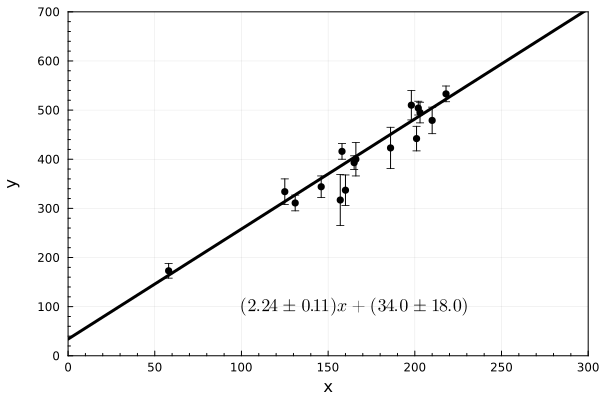

In [6]:
using CSV,DataFrames,Plots,LinearAlgebra,LaTeXStrings,SparseArrays

df = CSV.read("/Users/aaghazmahajan/Downloads/Ass2.csv",header = 1, delim = ",",ignorerepeated=true,DataFrame)
df1 = df[df.ID .> 4, :]
x = Array(df1.x)
y = Array(df1.y)
σx = Array(df1.sig_x)
σy = Array(df1.sig_y)
rho_xy = Array(df1.rho_xy)
n = length(x)

# Define Matrix
X = zeros(n)
Y = zeros(n) # defining a vector of n rows
A = ones(n,2) # defining matrix of n rows and 2 columns
C = zeros(n,n) # defining matrix of n rows and n columns
for i in 1:n
    Y[i] = y[i]
    X[i] = x[i]
    A[i,2] = X[i]
    C[i,i] = σy[i]^2
end

bestfit = inv(transpose(A)*inv(C)*A)*(transpose(A)*inv(C)*Y) #best fit
b1 = round(bestfit[1],digits = 0)
m1 = round(bestfit[2],digits = 2)
#The full uncertainty covariance matrix for each data point is given by
S = inv(transpose(A)*inv(C)*A)
# Standard Error in Intercept
SE_b = round(sqrt(S[1,1]),digits=0)
# Standard Error in Slope
SE_m = round(sqrt(S[2,2]),digits=2)
plot(framestyle=:box,xlims=(0,300),ylims=(0,700),xticks=10,xminorticks=5,yticks=12,yminorticks=5,xlabel="x",ylabel="y")
plot_lines = plot!(x -> m1*x + b1, 0, 300, color = :black, alpha = 1,lw=3,legend=false)
scatter!(X,Y,yerr = σy,label="σy",mc=:black)
note=raw"(\textrm{"*"$m1"*raw"} \pm \textrm{"*"$SE_m"*raw"})x + (\textrm{"*"$b1"*raw"} \pm \textrm{"*"$SE_b"*raw"})"
annotate!( 100,  100, text(latexstring(note),:left, 12))
     

# EXERCISE 2

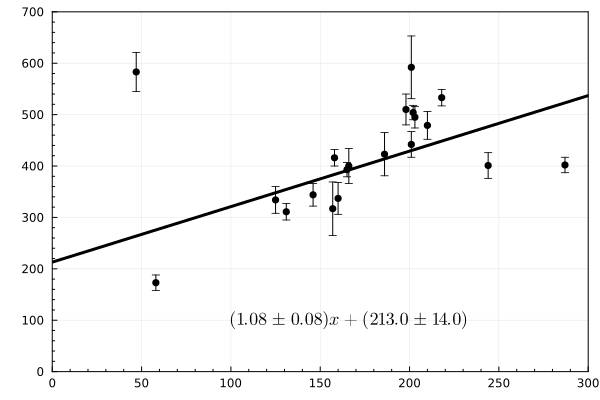

In [7]:
using CSV,DataFrames,Plots,LinearAlgebra,LaTeXStrings,SparseArrays

df = CSV.read("/Users/aaghazmahajan/Downloads/Ass2.csv",header = 1, delim = ",",ignorerepeated=true,DataFrame)
x = Array(df.x)
y = Array(df.y)
σx = Array(df.sig_x)
σy = Array(df.sig_y)
rho_xy = Array(df.rho_xy)
n = length(x)

# Define Matrix
X = zeros(n)
Y = zeros(n) # defining a vector of n rows
A = ones(n,2) # defining matrix of n rows and 2 columns
C = zeros(n,n) # defining matrix of n rows and n columns
for i in 1:n
    Y[i] = y[i]
    X[i] = x[i]
    A[i,2] = X[i]
    C[i,i] = σy[i]^2
end

bestfit = inv(transpose(A)*inv(C)*A)*(transpose(A)*inv(C)*Y) #best fit
b1 = round(bestfit[1],digits = 0)
m1 = round(bestfit[2],digits = 2)
#The full uncertainty covariance matrix for each data point is given by
S = inv(transpose(A)*inv(C)*A)
# Standard Error in Intercept
SE_b = round(sqrt(S[1,1]),digits=0)
# Standard Error in Slope
SE_m = round(sqrt(S[2,2]),digits=2)
plot(framestyle=:box,xlims=(0,300),ylims=(0,700),xticks=10,xminorticks=5,yticks=12,yminorticks=5)
plot_lines = plot!(x -> m1*x + b1, 0, 300, color = :black, alpha = 1,lw=3,legend=false)
scatter!(X,Y,yerr = σy,label="σy",mc=:black)
note=raw"(\textrm{"*"$m1"*raw"} \pm \textrm{"*"$SE_m"*raw"})x + (\textrm{"*"$b1"*raw"} \pm \textrm{"*"$SE_b"*raw"})"
annotate!( 100,  100, text(latexstring(note),:left, 12))

# Exercise 3

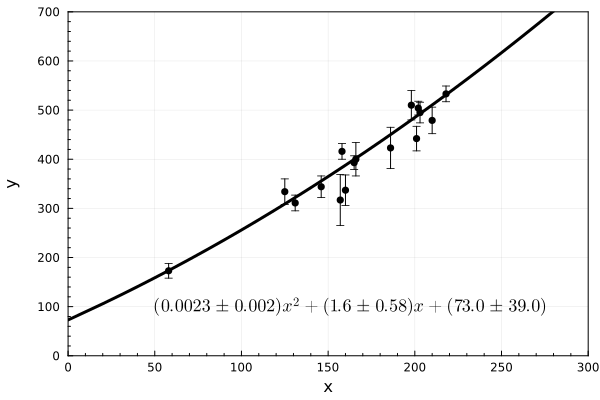

In [8]:
using CSV,DataFrames,Plots,LinearAlgebra,LaTeXStrings,SparseArrays

df = CSV.read("/Users/aaghazmahajan/Downloads/Ass2.csv",header = 1, delim = ",",ignorerepeated=true,DataFrame)
df1 = df[df.ID .> 4, :]
x = Array(df1.x)
y = Array(df1.y)
σx = Array(df1.sig_x)
σy = Array(df1.sig_y)
rho_xy = Array(df1.rho_xy)
n = length(x)

# Define Matrix
X = zeros(n)
Y = zeros(n) # defining a vector of n rows
A = ones(n,3) # defining matrix of n rows and 2 columns
C = zeros(n,n) # defining matrix of n rows and n columns
for i in 1:n
    Y[i] = y[i]
    X[i] = x[i]
    A[i,2] = X[i]
    A[i,3] = X[i]^2
    C[i,i] = σy[i]^2
end

bestfit = inv(transpose(A)*inv(C)*A)*(transpose(A)*inv(C)*Y) #best fit
b = round(bestfit[1,1],digits = 0)
m = round(bestfit[2,1],digits = 2)
q = round(bestfit[3,1],digits =4 )
#The full uncertainty covariance matrix for each data point is given by
S = inv(transpose(A)*inv(C)*A)
SE_b = round(sqrt(S[1,1]),digits=0)
SE_m = round(sqrt(S[2,2]),digits=2)
SE_q = round(sqrt(S[3,3]),digits=3)

plot(framestyle=:box,xlims=(0,300),ylims=(0,700),xticks=10,xminorticks=5,yticks=12,yminorticks=5,xlabel="x",ylabel="y")
plot_lines = plot!(x -> q*x^2+m*x + b, 0, 300, color = :black, alpha = 1,lw=3,legend=false)
scatter!(X,Y,yerr = σy,label="σy",mc=:black)
note=raw"(\textrm{"*"$q"*raw"} \pm \textrm{"*"$SE_q"*raw"})x^2 + (\textrm{"*"$m"*raw"} \pm \textrm{"*"$SE_m"*raw"})x + (\textrm{"*"$b"*raw"} \pm \textrm{"*"$SE_b"*raw"})"
annotate!( 50,  100, text(latexstring(note),:left, 12))


# Exercises 4 and 5 are done by hand, simply computing the extrema by evaluating the zero of the derivative.

# Exercise 6

Acceptance ratio was = 0.44334285714285715

Best-fit, overall!
[34.290758280611975, 2.2437159470239307, 0.28561898524329093, 442.6935077537012, 8.462324386007591] 0.2890087366679794 0.2698157549959509
Best-fit, marginalized
33.0 2.24
34.0 2.25
35.0 2.26
bestm = 2.25 bestb = 34.0


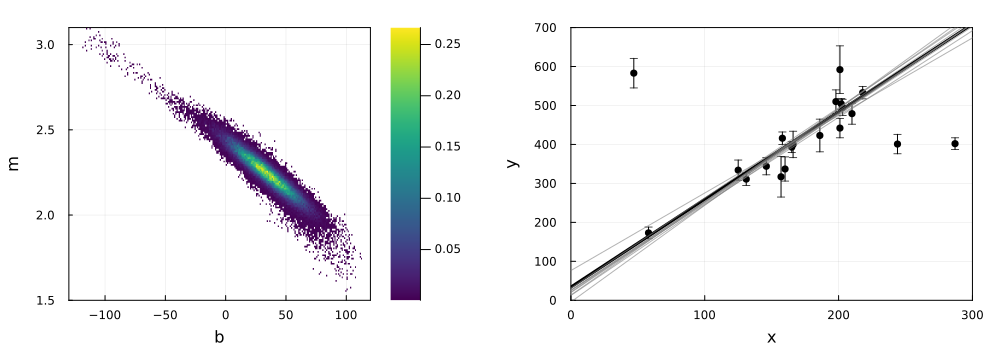

In [16]:
using CSV,DataFrames,Plots,Random,Distributions,LinearAlgebra,LaTeXStrings,SparseArrays,Statistics,Measures,StatsBase

df = CSV.read("/Users/aaghazmahajan/Downloads/Ass2.csv",header = 1, delim = ",",ignorerepeated=true,DataFrame)
x = Array(df.x)
y = Array(df.y)
σx = Array(df.sig_x)
σy = Array(df.sig_y)
rho_xy = Array(df.rho_xy)
n = length(x)

# Define Matrix
X = zeros(n)
Y = zeros(n) # defining a vector of n rows
A = ones(n,2) # defining matrix of n rows and 2 columns
C = zeros(n,n) # defining matrix of n rows and n columns
yerr = zeros(n)
for i in 1:n
    Y[i] = y[i]
    X[i] = x[i]
    A[i,2] = X[i]
    C[i,i] = σy[i]^2
    yerr[i] = σy[i]
end

#Now compute the best fit and the uncertainties
bestfit = inv(transpose(A)*inv(C)*A)*(transpose(A)*inv(C)*Y) #best fit

"""The objective function"""
function objective(pars,X,Y,yerr)
    b = pars[1]
    m = pars[2]
    Pb = pars[3]
    Yb = pars[4]
    Vb = exp(pars[5])
    if (Pb < 0 || Pb > 1)
        return -prevfloat(typemax(Float64))
    end
    return sum(log((1-Pb)/sqrt(2*pi*yerr[i]^2)*exp(-0.5*(Y[i]-m*X[i]-b)^2/yerr[i]^2)+Pb/sqrt(2*pi*(Vb+yerr[i]^2))*exp(-0.5*(Y[i]-Yb)^2/(Vb+yerr[i]^2))) for i in 1:length(X))#+pars[4]
end

#With this initial guess start off the sampling procedure
"""The metropolis_hastings MCMC function"""
function metropolis_hastings(initial_guess,X,Y,yerr,objective,nsample,nburn)
#With this initial guess start off the sampling procedure 
initialX = objective(initial_guess,X,Y,yerr)
currentX = initialX
bestX = initialX
bestfit = initial_guess
currentguess = initial_guess
naccept = 0
accepted_samples = []
push!(accepted_samples,currentguess)

parsigma=[5,0.075,0.01,1,0.1]   # proposal distribution
    for i in 1:(nburn+nsample)
        #Draw a sample from the proposal distribution
        newsample= zeros(5)
        newsample[1]= currentguess[1]+randn()*parsigma[1]
        newsample[2]= currentguess[2]+randn()*parsigma[2]
        #newsample[3]= rand()
        newsample[3]= currentguess[3]+randn()*parsigma[3]
        newsample[4]= currentguess[4]+randn()*parsigma[4]
        newsample[5]= currentguess[5]+randn()*parsigma[5]
        
        #Calculate the objective function for the newsample
        newX = objective(newsample,X,Y,yerr)
        u = rand()
        try
            #test = 0.0
            global test = exp(newX-currentX)
        catch error
            test = 2
        end
        if u < test
            #Accept
            currentX = newX
            currentguess = newsample
            naccept = naccept+1
        end
        if currentX > bestX
            bestfit = currentguess
            bestX = currentX
        end
        push!(accepted_samples,currentguess)
    end
    if ((naccept)/(nburn+nsample) < 0.5 || (naccept)/(nburn+nsample) > 0.8)
        println("Acceptance ratio was = ", (naccept)/(nburn+nsample))
        #println(naccept)
    end
    return bestfit, accepted_samples
end

#Now sample
initial_guess= ([bestfit[1],bestfit[2],0.0,mean(Y),log(var(Y))])#(m,b,Pb,Yb,Vb)
nsample = 2E5  #number of samples to take after burn-in
nburn = 10000
bestfit,accepted_samples = metropolis_hastings(initial_guess,X,Y,yerr,objective,nsample,nburn)
# accepted samples after burn in
samples=reduce(vcat,transpose.(accepted_samples))
samples=samples[setdiff(1:end, (1:nburn),(end)),:]
println()
println("Best-fit, overall!")
println(bestfit," ",mean(samples[:,3])," ",median(samples[:,3]))

#2D histogram
# Best-fit, marginalized
accepted_b = samples[:,1]
accepted_m = samples[:,2]
accepted_Pb = samples[:,3]
bins = Int(round(sqrt(nsample)/2))
histbm = fit(Histogram,(accepted_b,accepted_m),nbins=bins)

#Data with MAP line and sampling
# get the position of highest weights which is the most populated bin:
indexi=argmax(histbm.weights)[1]
indexj=argmax(histbm.weights)[2]
println("Best-fit, marginalized")
println(histbm.edges[1][indexi-1]," ",histbm.edges[2][indexj-1])
println(histbm.edges[1][indexi]," ",histbm.edges[2][indexj])
println(histbm.edges[1][indexi+1]," ",histbm.edges[2][indexj+1])
bestm = histbm.edges[2][indexj]
bestb = histbm.edges[1][indexi]
println("bestm = ",bestm," bestb = ",bestb)
histbm = histogram2d(accepted_b, accepted_m,nbins=bins, c=:viridis, xlabel="b", ylabel="m", xlims = (-130,120), ylims = (1.5,3.1),normalize=:pdf)

plot_lines = plot(xlims=(0,300),ylims=(0,700),legend=false)
plot_lines = plot!(x -> bestm*x + bestb, 0, 300,color = :black, alpha = 1,w=3,xlabel="x",ylabel="y",legend=false)
plot_lines = scatter!(X,Y,yerr=yerr,mc=:black)

#plot a sampling of 10 lines drawn from the marginalized posterior distribution for (m,b)
for i in 1:10
    ransample = Int(round(rand()*nsample))
    ransample = samples[ransample,1:2]
    mf = ransample[2]
    b  = ransample[1]
    plot_lines = plot!(x -> mf*x + b, 0, 300,color = :gray, alpha = 0.6,w=1,legend=false)
end
plot(histbm,plot_lines,size = (1000, 350),layout = (1,2), margin = 5mm,framestyle=:box)


